In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [93]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [94]:
!pip install statsmodels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
import statsmodels.api as sm

In [95]:
from sklearn.metrics import classification_report, r2_score,accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,mean_absolute_error,mean_absolute_percentage_error

In [96]:
df=pd.read_csv('/content/mhealth_raw_data.csv')
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alx,1215745.0,1.494200,3.826485,-22.1460,0.14131,1.308900,2.575800,20.0540
aly,1215745.0,-9.692878,4.171303,-19.6190,-10.20100,-9.670300,-9.042200,21.1610
alz,1215745.0,-0.954806,5.461803,-19.3730,-2.64940,-0.016456,1.301300,25.0150
glx,1215745.0,-0.001599,0.491217,-2.1466,-0.43599,-0.014842,0.448980,60.4840
gly,1215745.0,-0.616632,0.354641,-7.7899,-0.81801,-0.707320,-0.540340,2.0113
glz,1215745.0,-0.158781,0.546798,-2.6267,-0.59332,-0.190570,0.322200,2.7701
arx,1215745.0,-3.713413,4.763586,-22.3610,-6.07600,-2.977600,-1.193700,19.8640
ary,1215745.0,-5.805526,5.757639,-18.9720,-9.40420,-7.461500,-2.533900,22.1910
arz,1215745.0,2.393880,3.876503,-18.2390,0.12965,1.928100,4.914700,25.7410
grx,1215745.0,-0.276106,0.527689,-8.3392,-0.70588,-0.354900,0.096078,3.3196


In [99]:
df.isnull().sum()

,0
alx,0
aly,0
alz,0
glx,0
gly,0
glz,0
arx,0
ary,0
arz,0
grx,0


In [100]:
df.duplicated().sum()

np.int64(0)

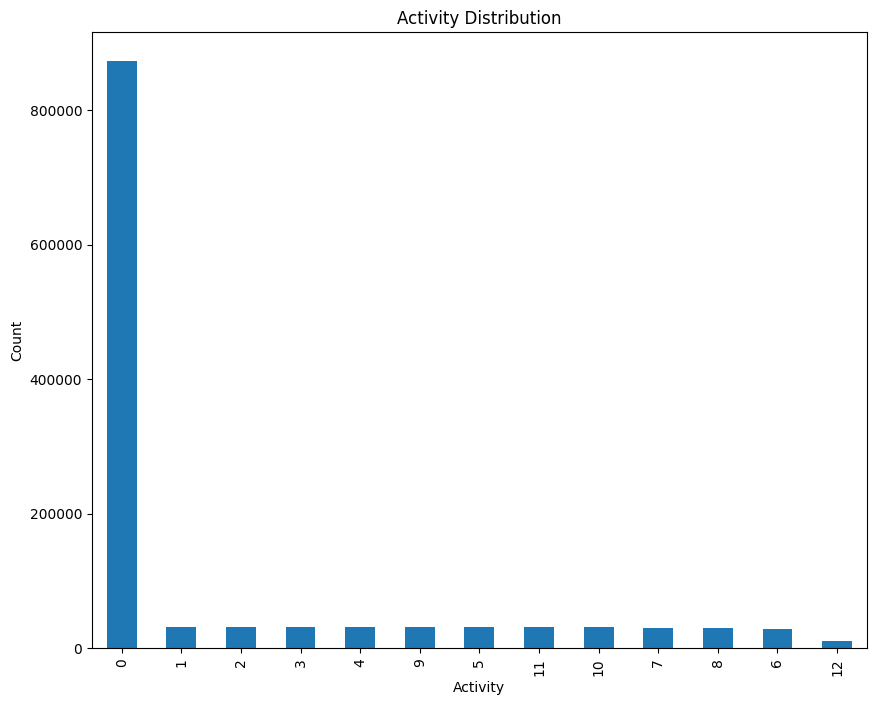

In [101]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot(kind='bar')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Activity Distribution')
plt.show()

In [102]:
data_activity_0=df[df['Activity']==0]
data_activity_else=df[df['Activity']!=0]

In [103]:
data_activity_0 = data_activity_0.sample(n=40000, replace=True)
df=pd.concat([data_activity_0,data_activity_else])

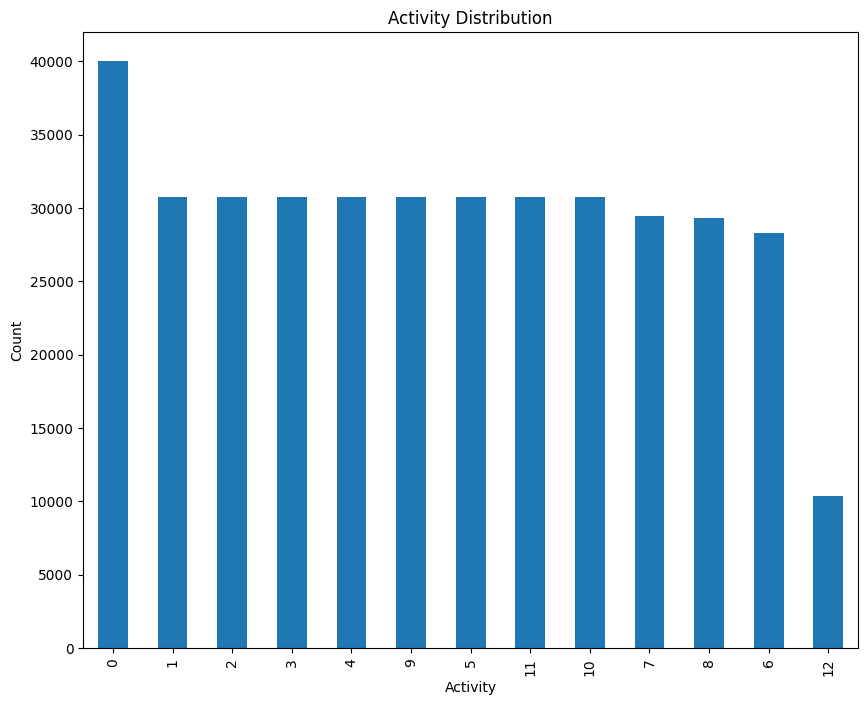

In [104]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot(kind='bar')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Activity Distribution')
plt.show()

In [105]:
len(df)

383195

In [106]:
activity_label={
    0:'Walking',
    1:'Walking upstairs',
    2:'Walking downstairs',
    3:'Sitting',
    4:'Standing',
    5:'Laying',
    6:'Jump'
}

======================Walking upstairs - a======================


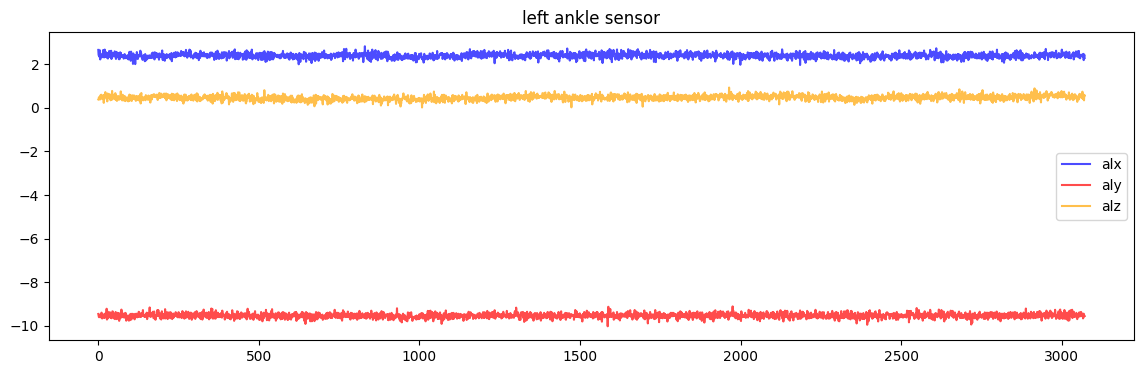

======================Walking upstairs - g======================


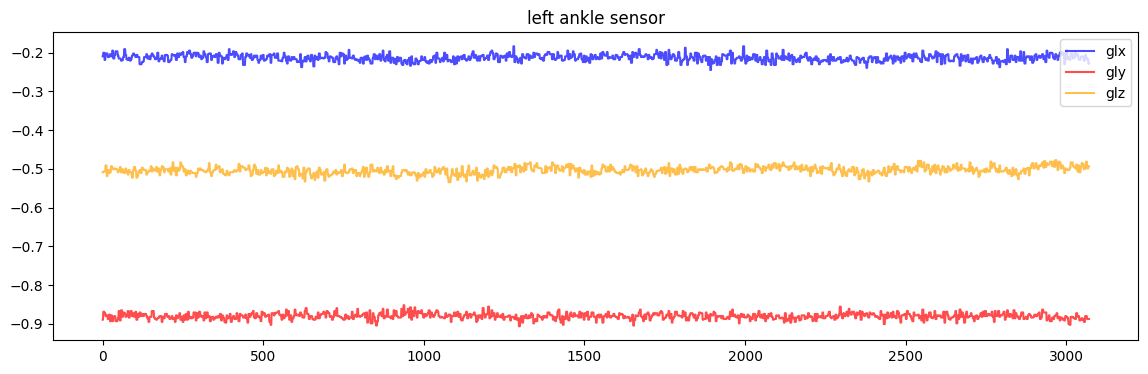

======================Walking downstairs - a======================


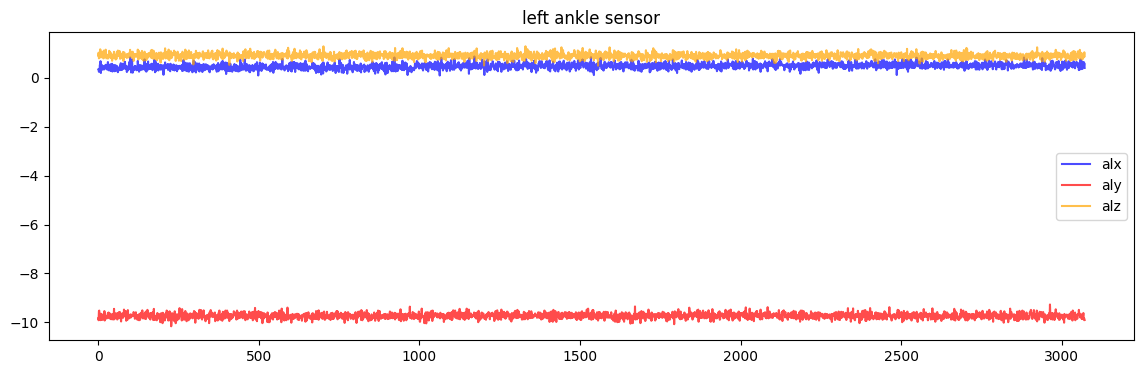

======================Walking downstairs - g======================


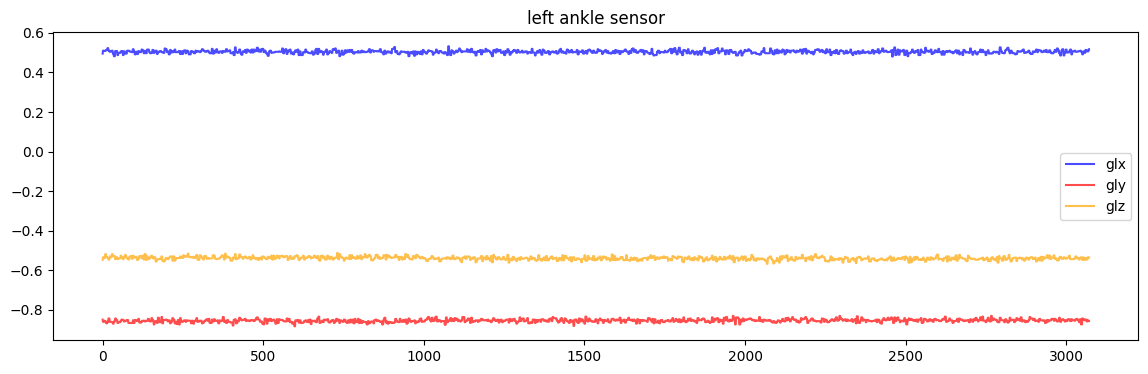

======================Sitting - a======================


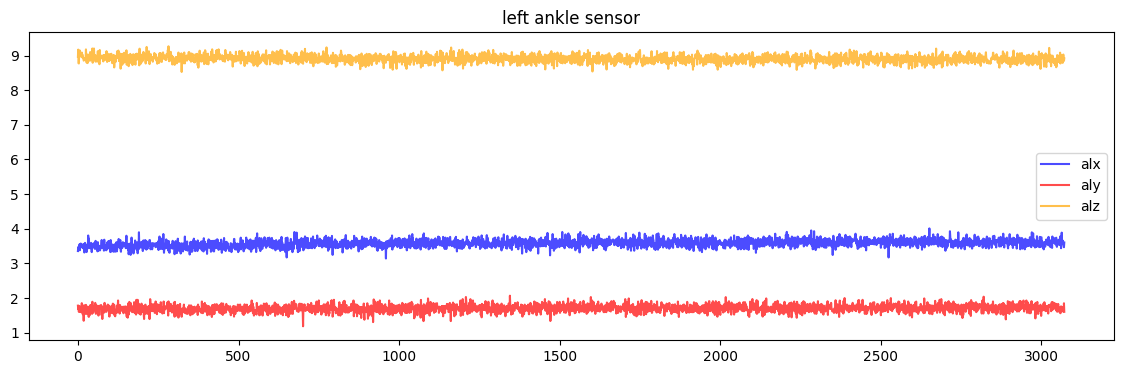

======================Sitting - g======================


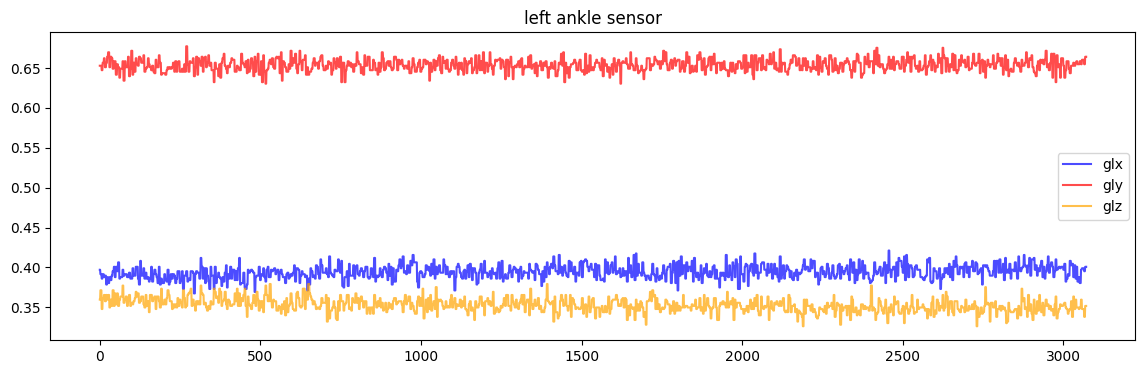

======================Standing - a======================


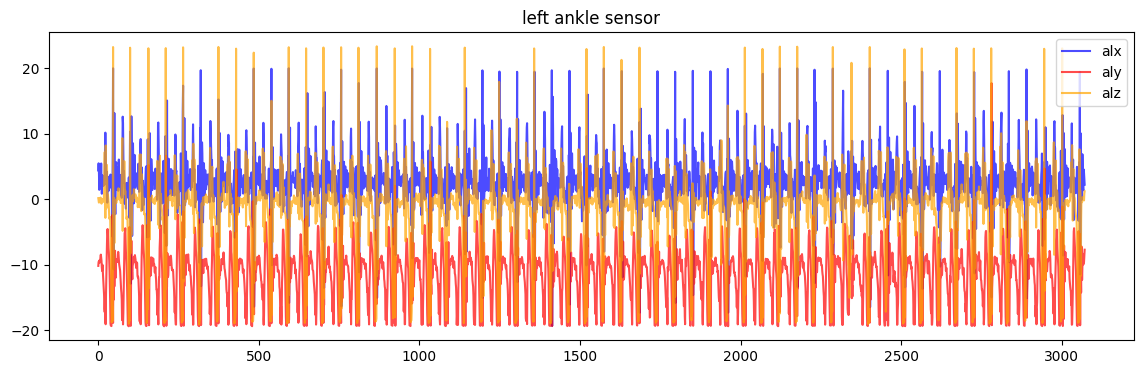

======================Standing - g======================


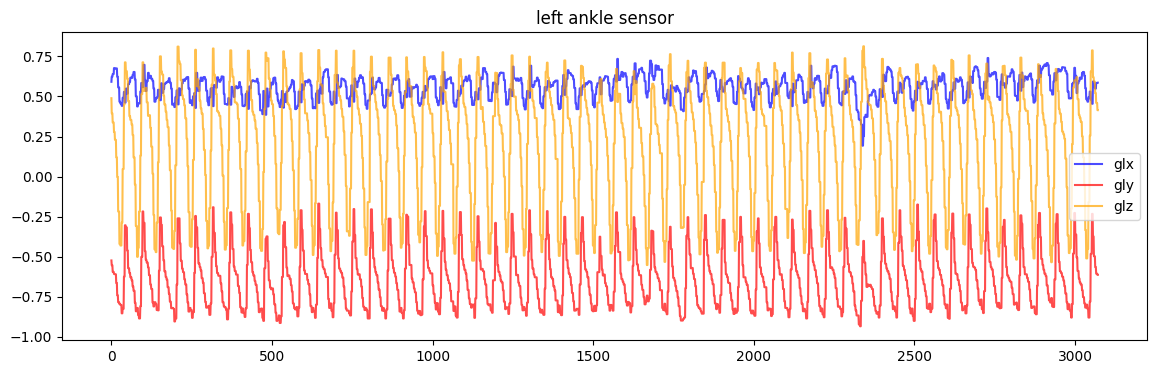

======================Laying - a======================


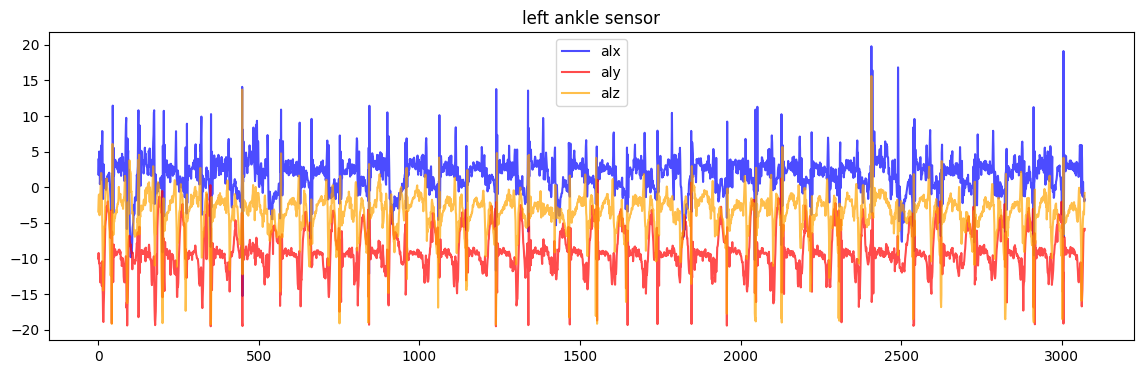

======================Laying - g======================


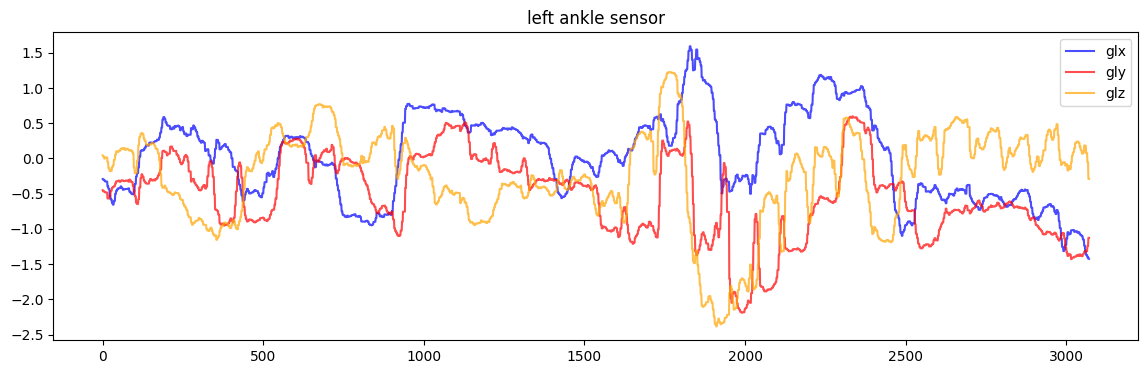

======================Jump - a======================


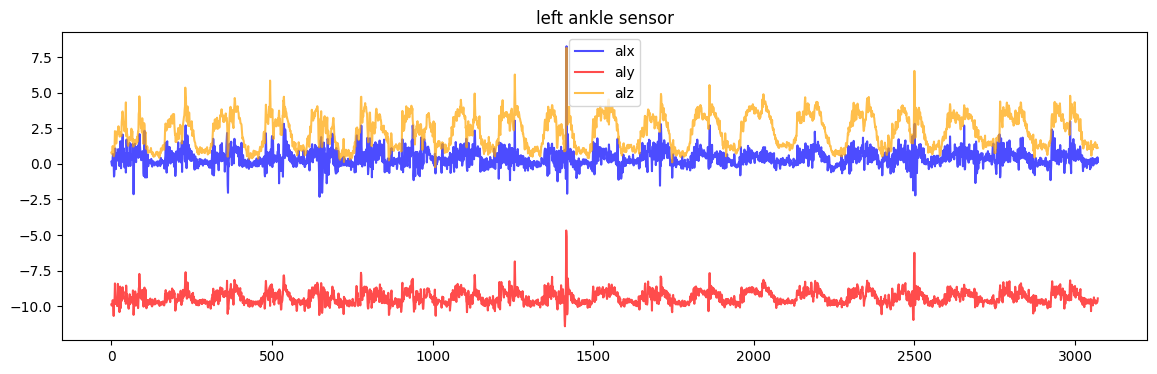

======================Jump - g======================


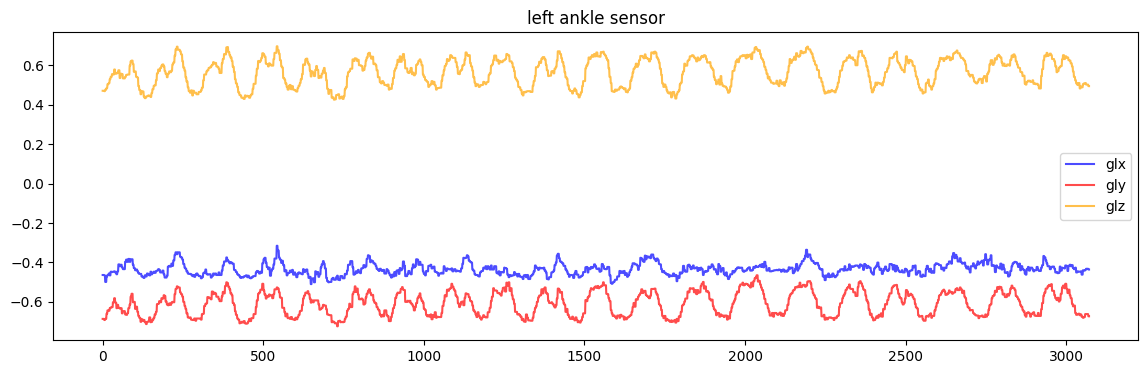

In [107]:
subject1=df[df['subject']=='subject1']
readings=['a','g']


for i in activity_label.keys():


    if i == 0:
        continue

    for r in readings:
      print(f"======================{activity_label[i]} - {r}======================")
      plt.figure(figsize=(14,4))

      plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "lx"],color = "blue",alpha=0.7,label= r +"lx")
      plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "ly"],color = "red",alpha=0.7,label= r +"ly")
      plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "lz"],color = "orange",alpha=0.7,label= r +"lz")
      plt.title("left ankle sensor")
      plt.legend()
      plt.show()

======================Walking upstairs - a======================


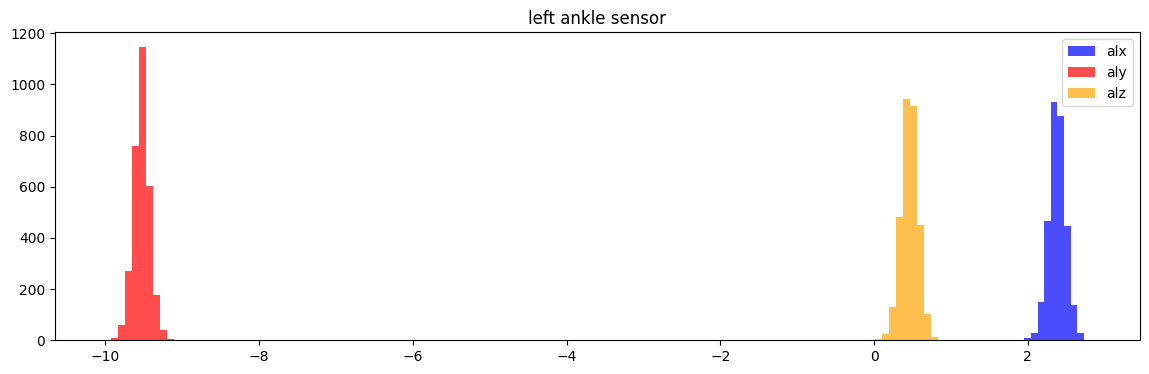

======================Walking upstairs - g======================


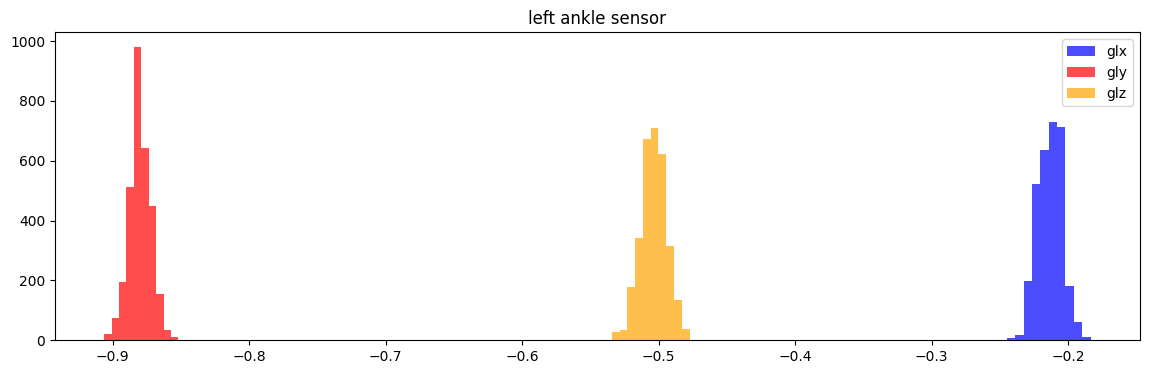

======================Walking downstairs - a======================


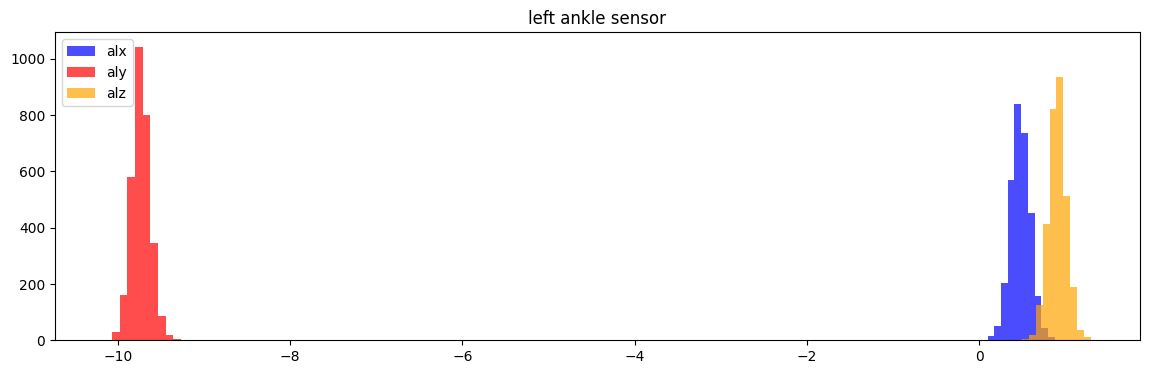

======================Walking downstairs - g======================


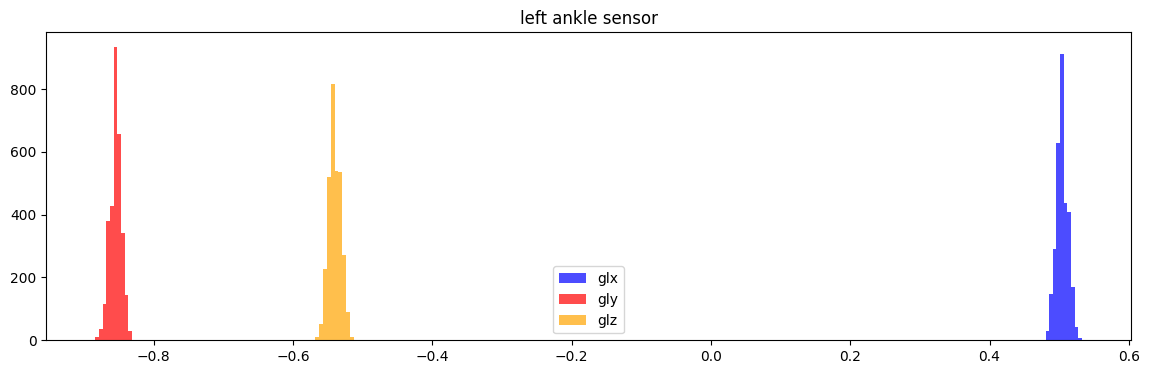

======================Sitting - a======================


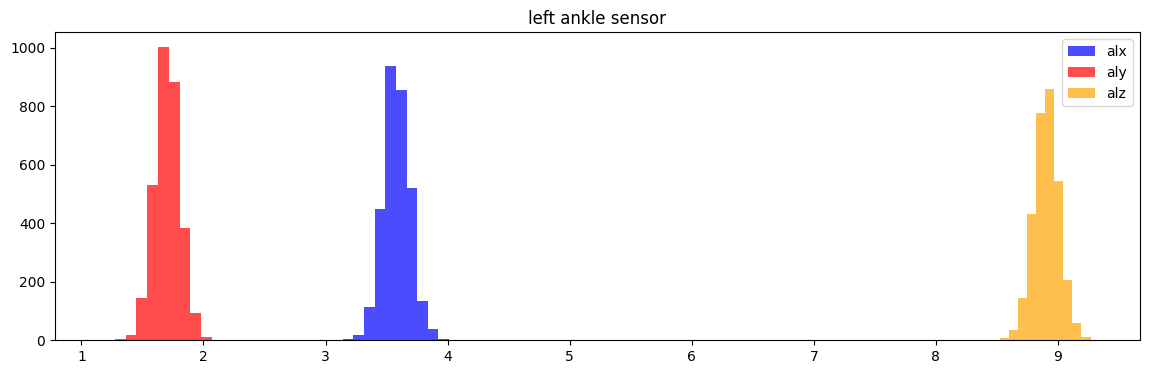

======================Sitting - g======================


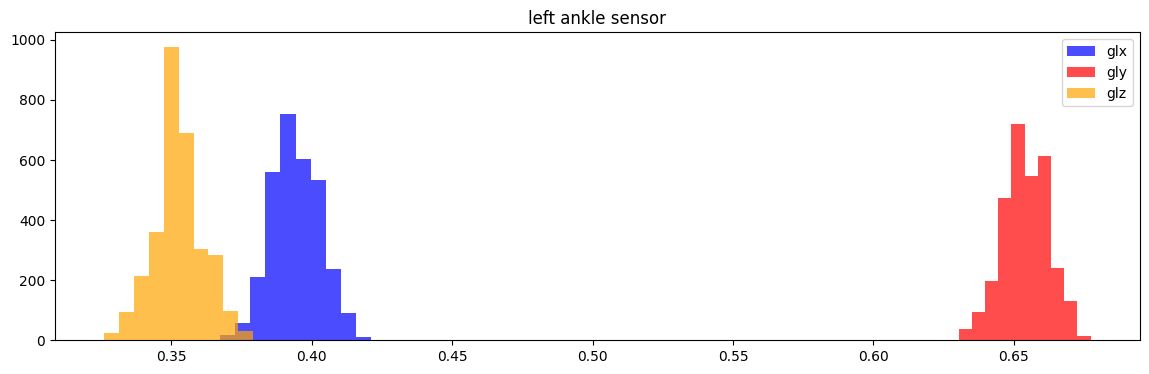

======================Standing - a======================


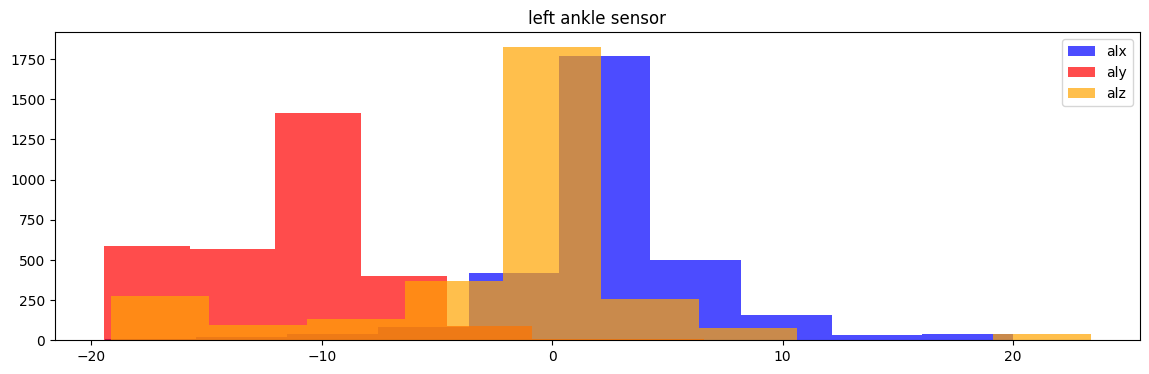

======================Standing - g======================


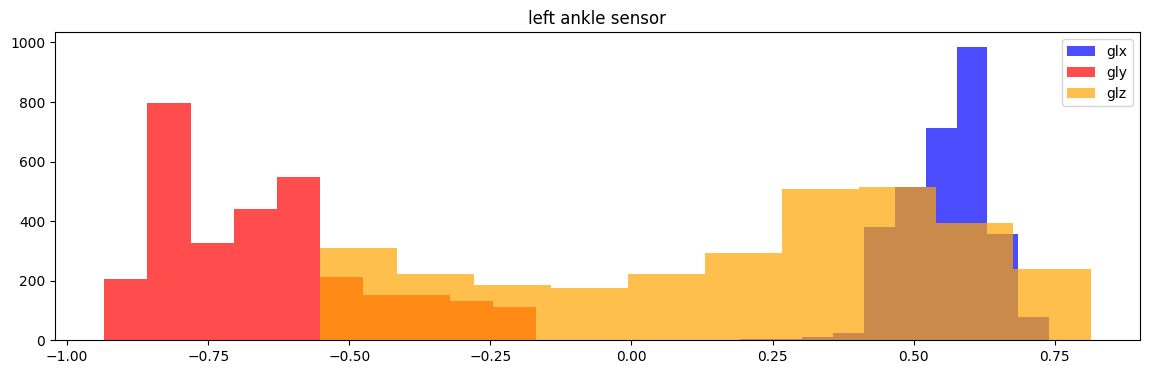

======================Laying - a======================


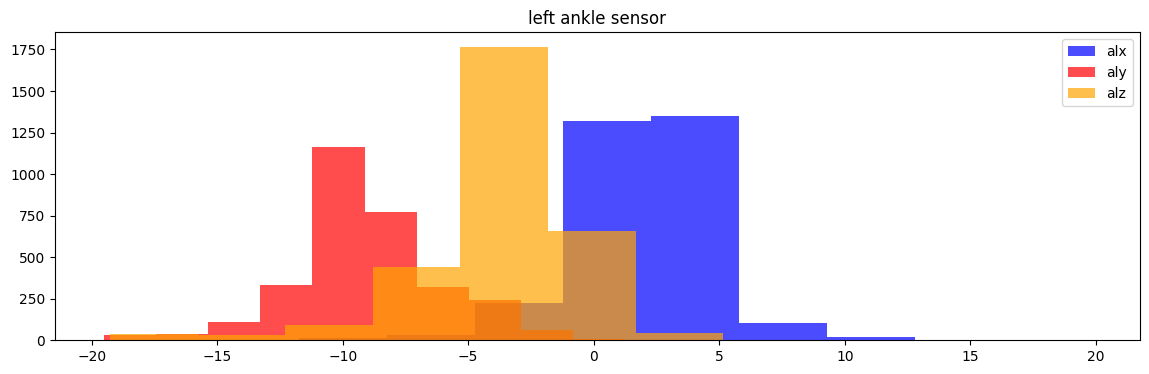

======================Laying - g======================


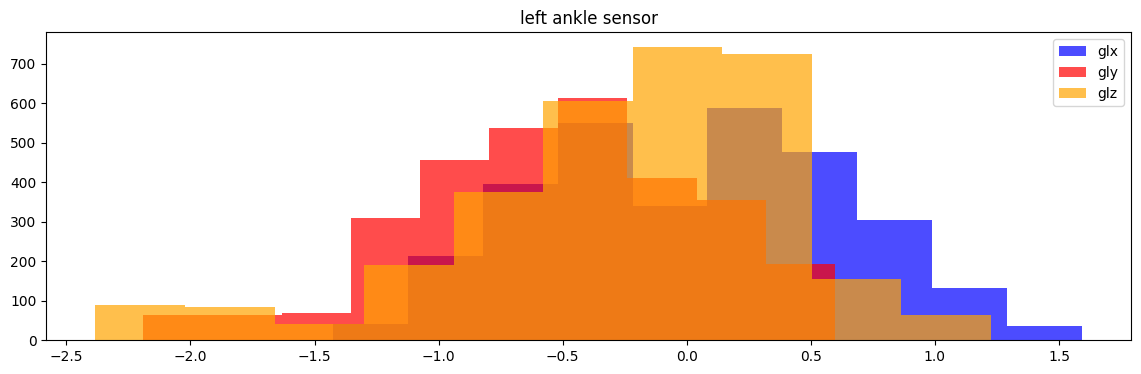

======================Jump - a======================


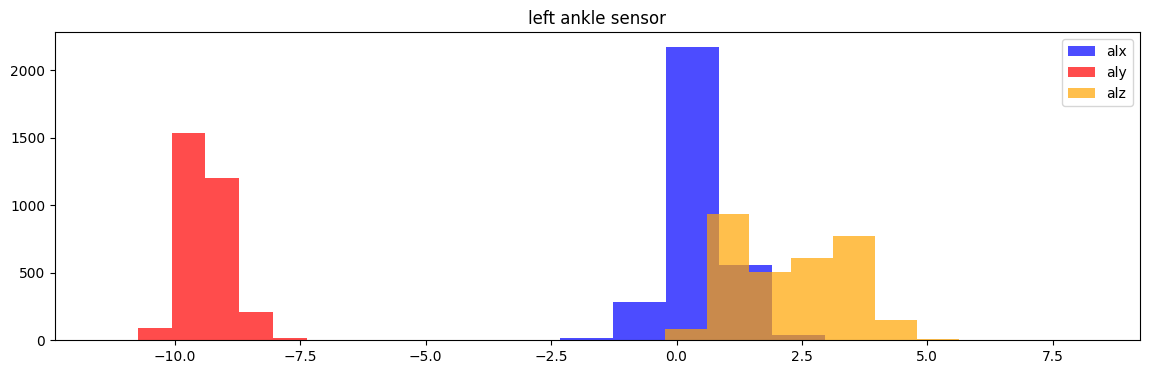

======================Jump - g======================


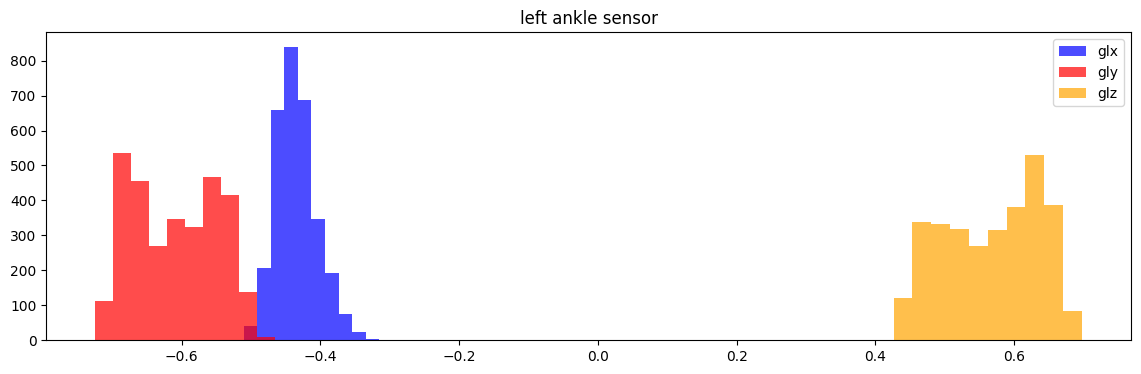

In [108]:
subject1=df[df['subject']=='subject1']
readings=['a','g']

# Iterate through the keys of the activity_label dictionary
for i in activity_label.keys():


    if i == 0:
        continue

    for r in readings:
      print(f"======================{activity_label[i]} - {r}======================")
      plt.figure(figsize=(14,4))
      # Removed the incorrect subplot plotting command
      plt.hist(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "lx"],color = "blue",alpha=0.7,label= r +"lx")
      plt.hist(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "ly"],color = "red",alpha=0.7,label= r +"ly")
      plt.hist(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "lz"],color = "orange",alpha=0.7,label= r +"lz")
      plt.title("left ankle sensor")
      plt.legend()
      plt.show()

In [109]:

df['Activity'] = df['Activity'].replace([0, 1, 2, 3, 4, 5, 6],
                                        ['Walking',
                                         'Walking upstairs',
                                         'Walking downstairs',
                                         'Sitting',
                                         'Standing',
                                         'Laying',
                                         'Jump'])

In [110]:
df["Activity"]

,Activity
980791,Walking
228077,Walking
620174,Walking
1049737,Walking
174738,Walking
...,...
1213641,12
1213642,12
1213643,12
1213644,12


In [111]:
df.Activity.value_counts()

,count
Activity,
Walking,40000
Walking upstairs,30720
Walking downstairs,30720
Sitting,30720
Standing,30720
9,30720
Laying,30720
11,30720
10,30720


<Axes: ylabel='count'>

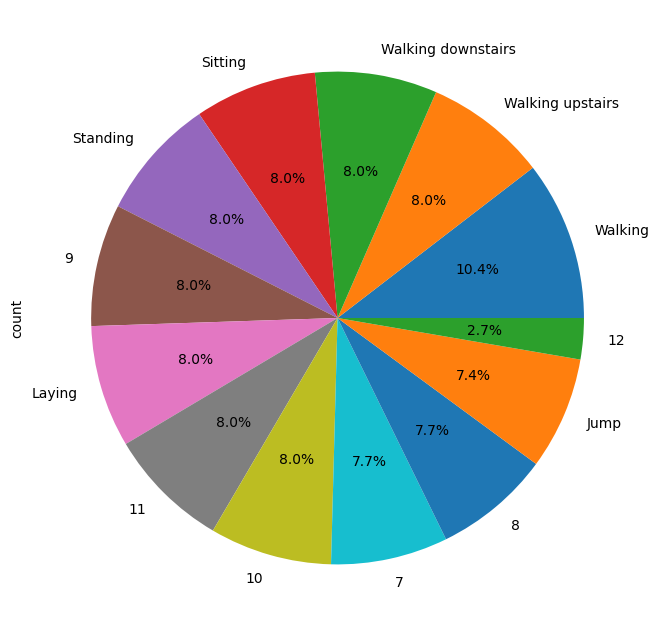

In [112]:
plt.figure(figsize=(12,8))
round(df["Activity"].value_counts()/df.shape[0]*100,2).plot.pie(autopct="%2.1f%%")


In [113]:
df1=df.copy()
for feature in df1.columns[:-2]:

  df[feature] = pd.to_numeric(df[feature], errors='coerce')
  df.dropna(subset=[feature], inplace=True)

  df1[feature] = pd.to_numeric(df1[feature], errors='coerce')
  df1.dropna(subset=[feature], inplace=True)


  lower_range = np.quantile(df[feature],0.01)
  upper_range = np.quantile(df[feature],0.99)
  print(feature,"range:",lower_range,'to',upper_range)

  df1=df1.drop(df1[(df1[feature ]> upper_range) | (df1[feature] < lower_range)].index,axis=0)
  print("shape",df1.shape)

alx range: -11.51306 to 19.216
shape (375533, 14)
aly range: -19.379 to 2.3858179999999996
shape (369696, 14)
alz range: -18.949 to 14.096059999999996
shape (365842, 14)
glx range: -0.75325 to 0.80891
shape (358838, 14)
gly range: -1.0657 to 0.96623
shape (352188, 14)
glz range: -1.1061 to 0.8290799999999999
shape (346528, 14)
arx range: -21.487 to 9.005065999999998
shape (341306, 14)
ary range: -18.691 to 11.832059999999998
shape (335112, 14)
arz range: -10.238 to 11.803
shape (332425, 14)
grx range: -1.0216 to 0.95294
shape (328871, 14)
gry range: -1.1458 to 0.9117
shape (323965, 14)
grz range: -0.7069 to 1.125
shape (319252, 14)


In [114]:
df1

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
228077,0.78752,-11.86600,-1.481300,-0.41187,-0.667920,-0.74853,-7.0493,-6.202900,0.71069,0.076471,-1.10060,-0.265090,Walking,subject2
620174,2.25820,-15.66400,0.968570,0.48980,-0.756100,0.33792,-7.2110,-2.687400,7.26150,-0.700000,0.22998,0.879310,Walking,subject5
1049737,1.64120,-9.95960,0.080933,-0.39147,-0.879920,-0.50491,-8.9281,-11.031000,6.94850,-0.376470,-0.90349,-0.512930,Walking,subject9
174738,5.88060,-14.19500,-3.682200,-0.60853,-0.061914,-0.81532,-2.8830,-9.959100,4.08540,0.580390,-0.68994,-0.334050,Walking,subject2
554189,1.72890,-9.83380,-0.213990,-0.56586,-0.793620,0.15914,-8.4922,1.030600,4.06190,-0.676470,0.81109,0.271550,Walking,subject5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213636,-0.19979,-0.93484,2.555400,0.63080,-0.525330,-0.67976,-4.0212,-0.082645,0.73545,-0.458820,-1.00000,0.122840,12,subject10
1213637,-0.33315,-1.23710,-2.919400,0.63822,-0.427770,-0.74853,-2.2515,-0.414790,0.52093,-0.417650,-1.03700,0.088362,12,subject10
1213640,6.77570,-15.07500,7.397400,0.61967,-0.337710,-0.82711,-2.2797,-2.358900,2.11120,-0.417650,-1.03700,0.088362,12,subject10
1213641,-2.48730,-19.23300,3.461400,0.61967,-0.337710,-0.82711,-8.2348,-4.965200,2.48090,-0.437250,-1.01850,0.079741,12,subject10


In [115]:
le=LabelEncoder()
df1['subject']=le.fit_transform(df1['subject'])

In [116]:

df['Activity'] = df['Activity'].replace([0, 1, 2, 3, 4, 5, 6],
                                        ['Walking',
                                         'Walking upstairs',
                                         'Walking downstairs',
                                         'Sitting',
                                         'Standing',
                                         'Laying',
                                         'Jump'])


print(df['Activity'].unique())
print(df['Activity'].apply(type).unique())




df['Activity'] = df['Activity'].astype(str)

le=LabelEncoder()


df['Activity']= le.fit_transform(df['Activity'])

['Walking' 'Walking upstairs' 'Walking downstairs' 'Sitting' 'Standing'
 'Jump' 7 8 9 10 11 12 'Laying']
[<class 'str'> <class 'int'>]


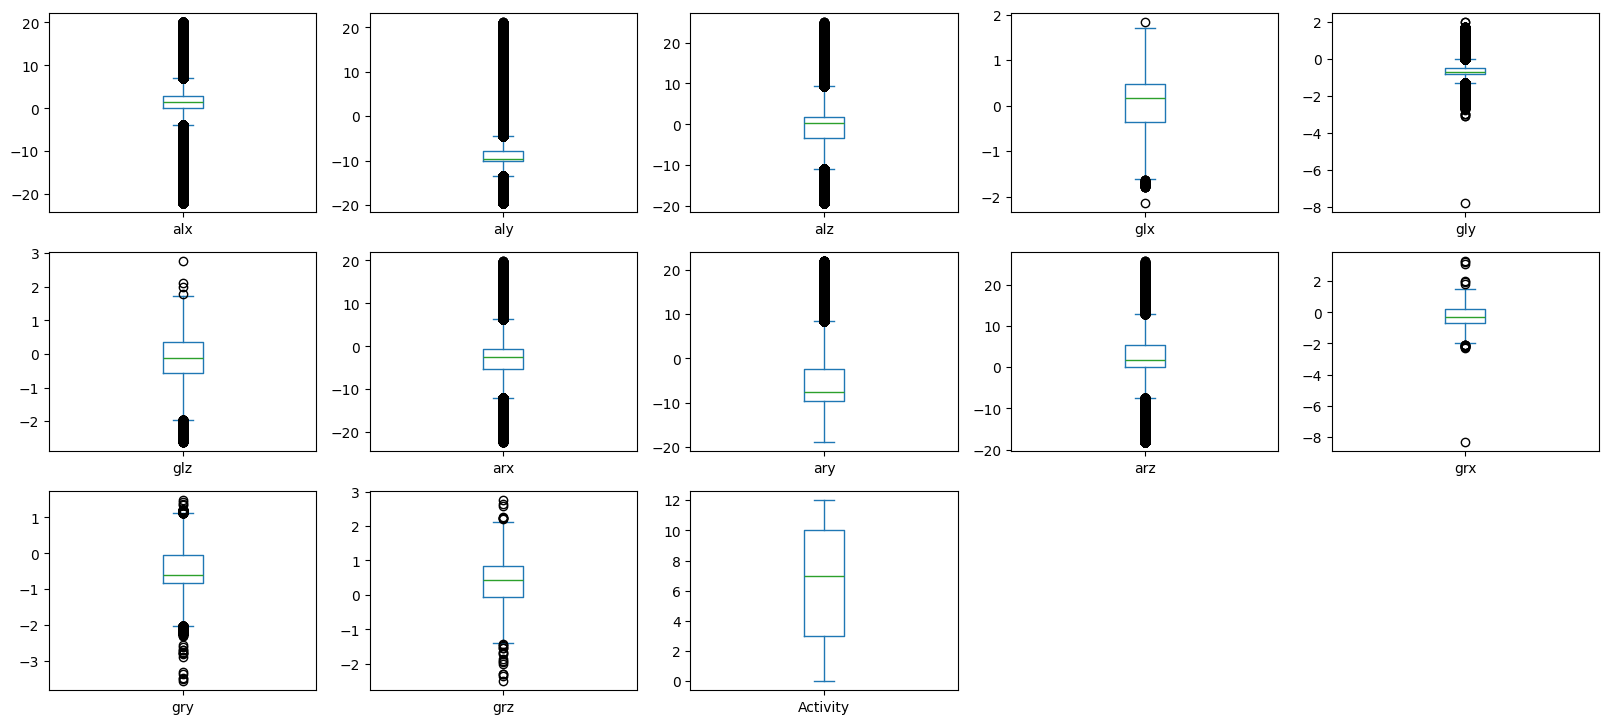

In [117]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(20,15))
plt.show()

In [118]:
x= df.drop(["Activity","subject"],axis=1).values
y=df['Activity'].values

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [120]:
ro_scalar=RobustScaler()


x_train_scaled=ro_scalar.fit_transform(x_train)
# Transform the test data using the fitted scaler
x_test_scaled=ro_scalar.transform(x_test)

In [121]:
def resultsSummarizer(y_true,y_pred,cm_en = True):
  cm=confusion_matrix(y_true,y_pred)
  acc=accuracy_score(y_true,y_pred)
  prec=precision_score(y_true,y_pred,average='macro')
  rec=recall_score(y_true,y_pred,average='macro')
  f1=f1_score(y_true,y_pred,average='macro')

  ply.figure(figsize=(15,15))

  sns.heatmap(cm, annot=True,cmap="Blues",xticklabels=activity_label.values(),yticklabels=activity_label.values())
  plt.show()

  print(classification_report(y_true,y_pred))

  print(f'Accuracy Score:' +'{:.4%}'.format(acc))
  print(f'Precision Score:' +'{:.4%}'.format(prec))
  print(f'Recall Score:' +'{:.4%}'.format(rec))
  print(f'F1 Score:' +'{:.4%}'.format(f1))

In [122]:


df.dropna(inplace=True)


x = df.drop(["Activity", "subject"], axis=1).values
y = df['Activity'].values



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=25)

ro_scalar = RobustScaler()


x_train_scaled = ro_scalar.fit_transform(x_train)


x_test_scaled = ro_scalar.transform(x_test)

lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
lr2=LogisticRegression()
lr2.fit(x_train_scaled,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
#lr2.score(x_train_scaled,y_train)

In [125]:
#lr2.score(x_test_scaled,y_test)

In [126]:
y_pred=lr2.predict(x_test_scaled)

In [127]:
 '''--- Train SVM model ---
svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # You can tune kernel, C, gamma
.fit(x_train_scaled, y_train)

 Predict with SVM
y_pred_svm = svm_model.predict(x_test_scaled)

 Evaluate SVM
print("=== SVM Model Performance ===")
resultsSummarizer(y_test, y_pred_svm)
'''

'--- Train SVM model ---\nsvm_model = SVC(kernel=\'rbf\', C=1, gamma=\'scale\')  # You can tune kernel, C, gamma\n.fit(x_train_scaled, y_train)\n\nPredict with SVM\ny_pred_svm = svm_model.predict(x_test_scaled)\n\nEvaluate SVM\nprint("=== SVM Model Performance ===")\nresultsSummarizer(y_test, y_pred_svm)\n'

In [128]:
'''# RANDOM FOREST MODEL FOR HUMAN ACTION DETECTION

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
data = pd.read_csv("mhealth_data.csv")   # replace with your actual filename

# Separate features and target
X = data.drop('activity', axis=1)  # 'activity' is the label column
y = data['activity']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate
print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))'''


'# RANDOM FOREST MODEL FOR HUMAN ACTION DETECTION\n\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import classification_report, accuracy_score\n\n# Load dataset\ndata = pd.read_csv("mhealth_data.csv")   # replace with your actual filename\n\n# Separate features and target\nX = data.drop(\'activity\', axis=1)  # \'activity\' is the label column\ny = data[\'activity\']\n\n# Split dataset\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Train Random Forest model\nrf = RandomForestClassifier(n_estimators=200, random_state=42)\nrf.fit(X_train, y_train)\n\n# Predictions\ny_pred = rf.predict(X_test)\n\n# Evaluate\nprint("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred))\nprint("\nClassification Report:\n", classification_report(y_test, y_pred))'

In [129]:
'''from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("✅ KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

'''

'from sklearn.neighbors import KNeighborsClassifier\n\nknn = KNeighborsClassifier(n_neighbors=5)\nknn.fit(X_train, y_train)\n\ny_pred_knn = knn.predict(X_test)\n\nprint("✅ KNN Accuracy:", accuracy_score(y_test, y_pred_knn))\nprint("\nClassification Report:\n", classification_report(y_test, y_pred_knn))\n\n'

In [130]:
'''from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("✅ Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

'''

'from sklearn.tree import DecisionTreeClassifier\n\ndt = DecisionTreeClassifier(criterion=\'gini\', max_depth=None, random_state=42)\ndt.fit(X_train, y_train)\n\ny_pred_dt = dt.predict(X_test)\n\nprint("✅ Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))\nprint("\nClassification Report:\n", classification_report(y_test, y_pred_dt))\n\n'

In [131]:
def resultsSummarizer(y_true,y_pred,cm_en = True):
  cm=confusion_matrix(y_true,y_pred)
  acc=accuracy_score(y_true,y_pred)
  prec=precision_score(y_true,y_pred,average='macro')
  rec=recall_score(y_true,y_pred,average='macro')
  f1=f1_score(y_true,y_pred,average='macro')

  # Corrected ply to plt
  plt.figure(figsize=(15,15))

  sns.heatmap(cm, annot=True,cmap="Blues",xticklabels=activity_label.values(),yticklabels=activity_label.values())
  plt.show()

  print(classification_report(y_true,y_pred))

  print(f'Accuracy Score:' +'{:.4%}'.format(acc))
  print(f'Precision Score:' +'{:.4%}'.format(prec))
  print(f'Recall Score:' +'{:.4%}'.format(rec))
  print(f'F1 Score:' +'{:.4%}'.format(f1))

In [132]:

  import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler



feature_names = [
    'alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz']



lr2 = LogisticRegression(max_iter=1000) # Increased max_iter to help with convergence
lr2.fit(x_train_scaled, y_train)

# Take user input
print("Enter the following 12 features (separated by space or one by one):")
user_input = []

for feature in feature_names:
    val = float(input(f"Enter value for {feature}:  "))
    user_input.append(val)

# Convert to numpy array and reshape
input_array = np.array(user_input).reshape(1, -1)

# Scale the user input using the same scaler fitted on the training data
input_array_scaled = ro_scalar.transform(input_array)


# Predict
prediction = lr2.predict(input_array_scaled)

# Decode the prediction back to activity label
# Make sure activity_label dictionary is available in the environment
predicted_activity = activity_label[prediction[0]]

print("Predicted Action:", predicted_activity)


Enter the following 12 features (separated by space or one by one):
Enter value for alx:  2.20
Enter value for aly:  -9.54
Enter value for alz:  0.52
Enter value for glx:  0.089
Enter value for gly:  -0.82
Enter value for glz:  -0.69
Enter value for arx:  -8.6
Enter value for ary:  -4.10
Enter value for arz:  0.12
Enter value for grx:  -0.46
Enter value for gry:  -1.01
Enter value for grz:  0.01
Predicted Action: Walking
